**Méthodes numériques, PHYS-F303 (Module 6).***
*********************************
Méthode de Monte-Carlo, Mouvement Brownien, Modèle d'Ising
==
### But #
Travailler avec des nombres pseudo-aléatoires pour générer une certaine distribution  etc.



## Challenge 1: Nombres aléatoires
Enoncé:
"1) Python has many built-in random number generators. Check-out the documentation and try a couple of ones. In particular, compare the output of the built-in expontential and Gaussian generators with the versions implemented above.

2) Another popular method to generate numbers according to the Gaussian distribution is known as the Box–Muller algorithm. Look up its definition on the web, try to implement it and verify that it works as expected."

### Question 1:

In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
i=0
a=numpy.zeros(100000)
while i<(len(a)-1) :
    
    
    a[i]=(numpy.random.uniform(42,50))
    i+=1

In [3]:
i=0
b=numpy.zeros(100000)
while i<(len(a)-1) :
    
    t=numpy.random.random()
    b[i]=(42*(1-t)+t*50)
    i+=1

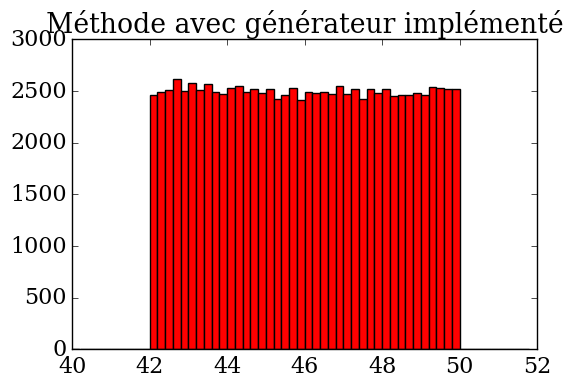

In [4]:
pyplot.title('Méthode avec générateur implémenté')
pyplot.xlim(40,52)
pyplot.hist(a,bins=numpy.arange(40,52, 0.2),normed=False, color = 'red');


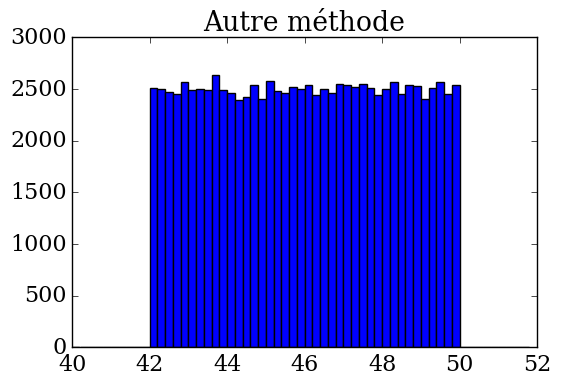

In [5]:
pyplot.title('Autre méthode')
pyplot.xlim(40,52)
pyplot.hist(b,bins=numpy.arange(40,52, 0.2),normed=False, color = 'blue');

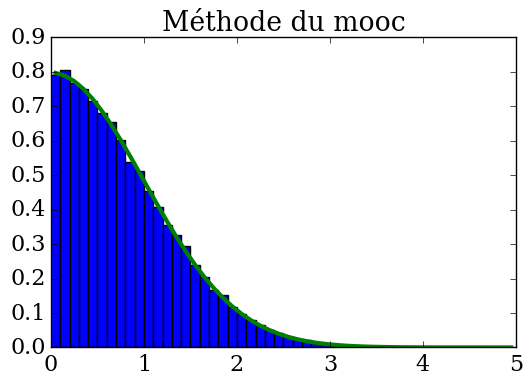

In [6]:
# Number of random numbers to draw according to p1 
K = 1.4

# Empty list for the final set of numbers
h=[]

while len(h)<100000:
    u1 = numpy.random.random_sample()
    
    # Distribute g according to the exponential distribution
    g = numpy.log(1/(1-u1))
    
    # Generate a second number for the acceptance/rejection condition
    u2 = numpy.random.random_sample()
    
    # Acceptance/rejection step
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
    if (u2<ratio):
        # Append g to the set h
        h.append(g)


# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.title('Méthode du mooc')
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),normed=True,color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')


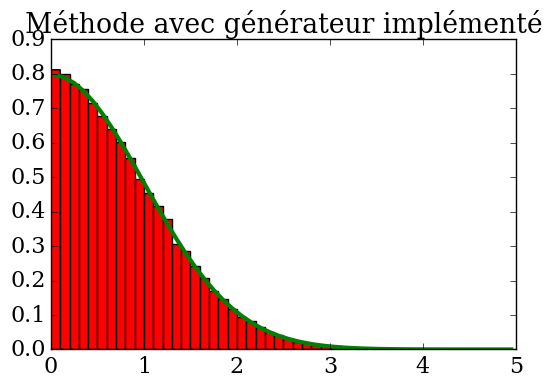

In [7]:
a=(numpy.random.normal(0,1,size=100000))

for i in range (len(a)) :
    if a[i]<0 :
        while a[i]<0 :
            a[i]=(numpy.random.normal(0,1,size=None))

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.title('Méthode avec générateur implémenté')
pyplot.hist(a,bins=numpy.arange(0,5., binwidth),normed=True,color='Red');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')


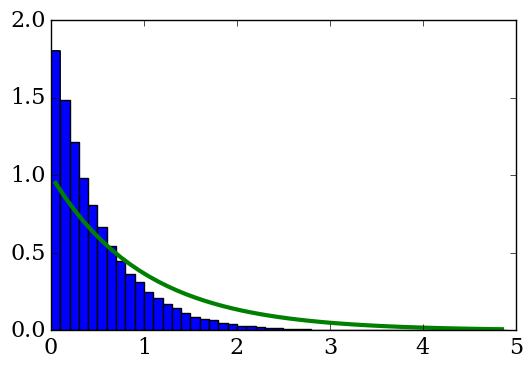

In [8]:
# Empty list for the final set of numbers
h=[]

while len(h)<=100000:
    u1 = numpy.random.random_sample()
    
    # Distribute g according to the exponential distribution
    g = numpy.log(1/(1-u1))
    
    # Generate a second number for the acceptance/rejection condition
    u2 = numpy.random.random_sample()
    
    # Acceptance/rejection step
    ratio = numpy.exp(-g)
    if (u2<ratio):
        # Append g to the set h
        h.append(g)


binwidth=0.1
bins=numpy.arange(0.,5., binwidth)
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,numpy.exp(-xc),lw=3,color='green')

pyplot.title('')
pyplot.xlim(0,5)
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),normed=True, color = 'blue');


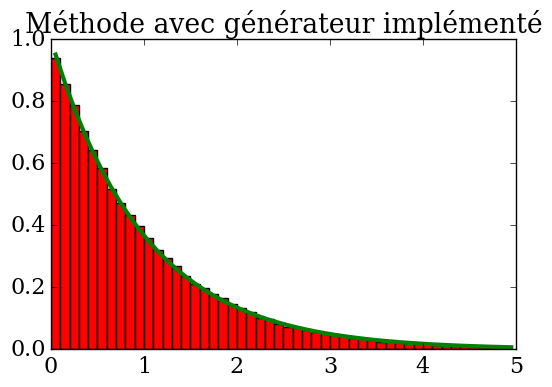

In [9]:
a=numpy.random.exponential(size=100000)

binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,numpy.exp(-xc),lw=3,color='green')

pyplot.title('Méthode avec générateur implémenté')
pyplot.xlim(0,5)
pyplot.hist(a,bins=numpy.arange(-3.,5., binwidth),normed=True, color = 'red');


### Question 2: Box Muller algorithm

On part de deux variables aléatoires indépendantes $U$ et $V$ uniformément distribuées sur [0,1]. L'algorithm de Box Muller les transforme en deux variables aléatoires indépendantes distribuées selon une Gaussienne de moyenne 0 et d'écart-type 1:
$$Z=\sqrt{-2ln(U)}cos(2\pi V)$$
$$W=\sqrt{-2ln(U)}sin(2\pi V)$$


In [10]:
i=0
u=numpy.zeros(100000)
v=numpy.zeros(100000)
while i<(len(u)) :
    u[i]=(numpy.random.uniform(0,1))
    v[i]=(numpy.random.uniform(0,1))
    i+=1

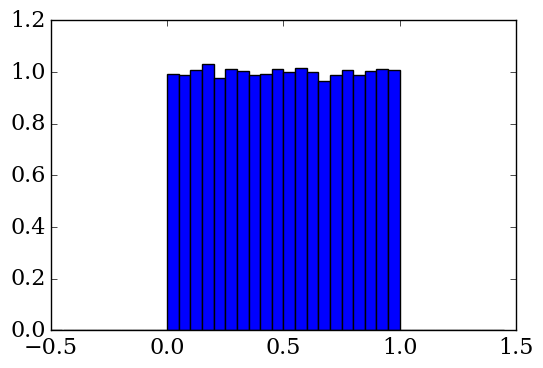

In [11]:
binwidth=0.05
pyplot.xlim(-0.5,1.5)
pyplot.hist(u,bins=numpy.arange(-0.5,1.5, binwidth),normed=True);

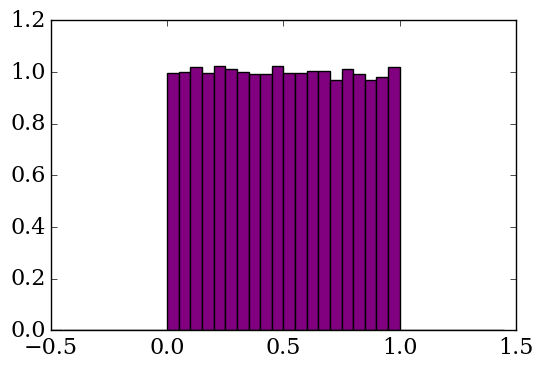

In [12]:
binwidth=0.05
pyplot.xlim(-0.5,1.5)
pyplot.hist(v,bins=numpy.arange(-0.5,1.5, binwidth),normed=True,color='purple');

In [13]:
z=numpy.zeros(100000)
w=numpy.zeros(100000)
for j in range (0,len(u)):
    z[j]=numpy.sqrt(-2*numpy.log(u[j]))*numpy.cos(2*numpy.pi*v[j])
    w[j]=numpy.sqrt(-2*numpy.log(u[j]))*numpy.sin(2*numpy.pi*v[j])

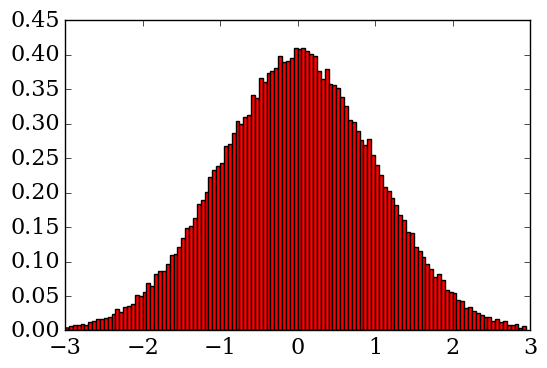

In [14]:
binwidth=0.05
pyplot.xlim(-3,3)
pyplot.hist(z,bins=numpy.arange(-3.,3., binwidth),normed=True, color='red');

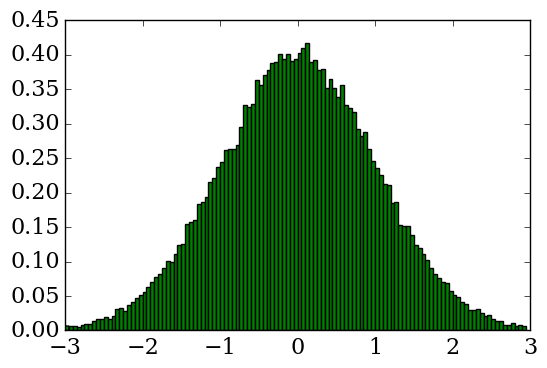

In [15]:
binwidth=0.05
pyplot.xlim(-3,3)
pyplot.hist(w,bins=numpy.arange(-3.,3., binwidth),normed=True,color='green');

## Challenge 2: Mouvement aléatoire

### 1.

"- Add as systematic contribution to the displacement $dx$,

$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

where $c$ is a constant and analyse the behaviour of the random walk. Can you guess the corresponding equation governing the evolution of the density in this case? What is the analitical solution for an initial Gaussian distribution?

In [16]:
# Generate a set of initial positions based on the Gaussian distribution
npart=100000

# We set mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)

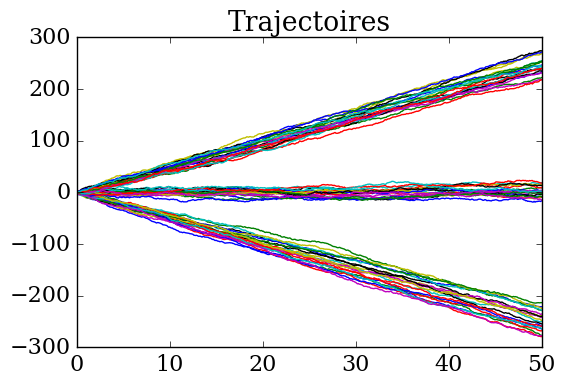

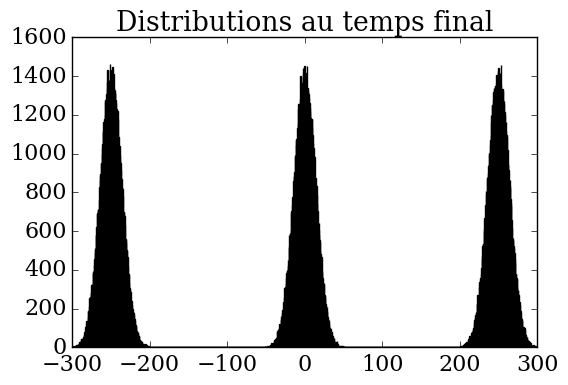

In [17]:
T=50.0
nt=500
dt=T/nt
alpha=2.0

c=[-5,0,5]

for j in range(len(c)):

    t = numpy.arange(0,T+dt,dt)
    x = numpy.empty([nt+1,npart])

    x[0]=x0

    for i in range(nt):
   
            x[i+1]=x[i]+c[j]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

    for i in range(20):
        pyplot.figure(1)
        pyplot.title('Trajectoires')
        pyplot.plot(t,x[:,i])
    
    pyplot.figure(2)
    pyplot.title('Distributions au temps final')
    pyplot.hist(x[nt],bins=numpy.arange(-300,300., 0.5),normed=False, color='red');

=> Le terme c.dt peut donc être vu comme un terme de dérivation jouant sur toutes les particules de la même manière et n'affectant donc pas la distribution des particules durant leur évolution.

### 2.

- Simulate the following random walk with a 'friction' term:

$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$

Check that the distribution reaches a steady state for $t\rightarrow \infty$. Can you guess the corresponding equation governing the evolution of the density in this case? What is analytical form for the steady state? These last two questions are not easy!"

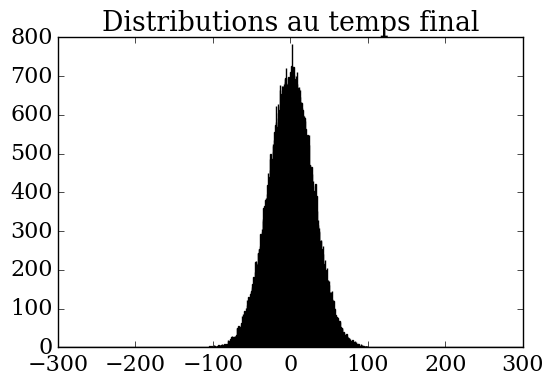

In [18]:
T=200.0
nt=500
dt=T/nt
alpha=2.0

#gamma=0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
   
        x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    
pyplot.figure(2)
pyplot.title('Distributions au temps final')
pyplot.hist(x[nt],bins=numpy.arange(-300,300., 0.5),normed=False, color='red');

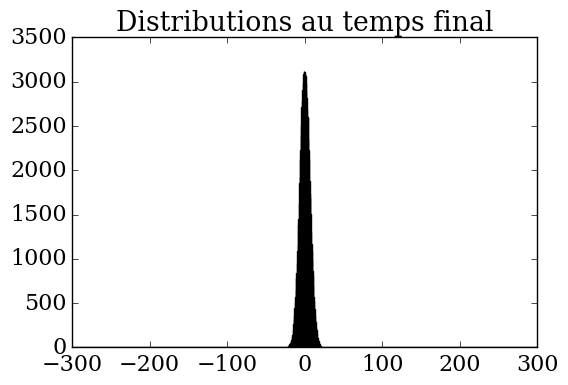

In [19]:
f=-0.05
#gamma = 0.05

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
   
        x[i+1]=x[i]+f*x[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

    
pyplot.figure(2)
pyplot.title('Distributions au temps final')
pyplot.hist(x[nt],bins=numpy.arange(-300,300., 0.5),normed=False, color='red');

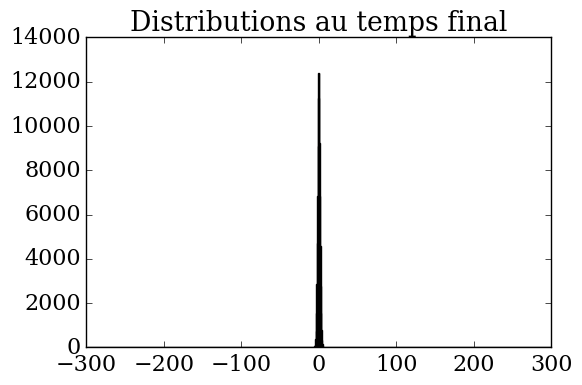

In [20]:
f=-1
#gamma = 1

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
   
        x[i+1]=x[i]+f*x[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    
pyplot.figure(2)
pyplot.title('Distributions au temps final')
pyplot.hist(x[nt],bins=numpy.arange(-300,300., 0.5),normed=False, color='red');

## Challenge 3: Modèle d'Ising
Enoncé:"
- Perform a series of runs with $\alpha \in [0 1]$ and plot the average energy of the system and its magnetisation as a function of $\alpha$. Estimate the critical value of $\alpha$ at which the phase transition occurs. Is it compatible with Onsager's exact solution for the system?
- Redo the analysis with a different set of boundary conditions for the lattice and a different initial lattice configuration. For example, you could assume that on the borders all the spins are pointing upwards on the borders while they are randomly oriented in the bulk."

In [21]:
from matplotlib import animation
import matplotlib.cm as cm
from JSAnimation.IPython_display import display_animation